In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [155]:
df = pd.read_csv('sms_spam.csv', encoding='ISO-8859-1')

In [156]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [157]:
df.shape

(5572, 5)

In [158]:
# Data cleaning
# EDA
# Text preproccessing
# Model Building
# Evalutation
# Improvements
# Website
# Deployment

# Data Cleaning

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [161]:
 # drop cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [162]:
df.sample(4)

,v1,v2
5447,ham,So that takes away some money worries
1645,ham,I.ll post her out l8r. In class
516,spam,Boltblue tones for 150p Reply POLY# or MONO# e...
696,ham,"Aight, you close by or still down around alex'..."


In [163]:
# rename the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [164]:
df.sample(5)

,target,text
2959,ham,Sir send to group mail check it.
2764,ham,Open rebtel with firefox. When it loads just p...
4947,spam,"Hi this is Amy, we will be sending you a free ..."
997,ham,Not a lot has happened here. Feels very quiet....
2487,ham,K ill drink.pa then what doing. I need srs mod...


In [165]:
# labeling target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [166]:
df['target'] = le.fit_transform(df['target']) 
# ham = 0
# spam = 1

In [167]:
df.isna().sum() #missing values check

target    0
text      0
dtype: int64

In [168]:
df.duplicated().sum()

403

In [169]:
# drop duplicate rows
df.drop_duplicates(keep='first',inplace=True)

In [170]:
df.shape

(5169, 2)

In [171]:
df.duplicated().sum()

0

# EDA

In [173]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

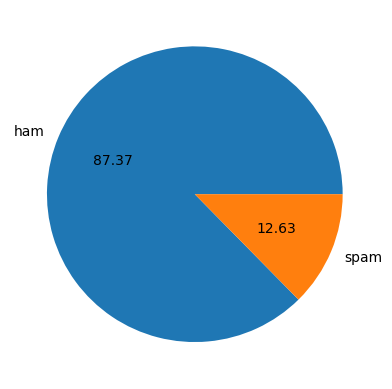

In [174]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

- data is imbalanced

In [176]:
!pip install nltk

In [177]:
import nltk
import nltk.data

In [178]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### creating 3 new feature :
- length of text
- num of words
- num of sentances

In [180]:
df['num_chars'] = df['text'].apply(len)

In [181]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [182]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [183]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [184]:
# ham messages
df[df['target'] == 0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [185]:
# spam messages
df[df['target'] == 1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


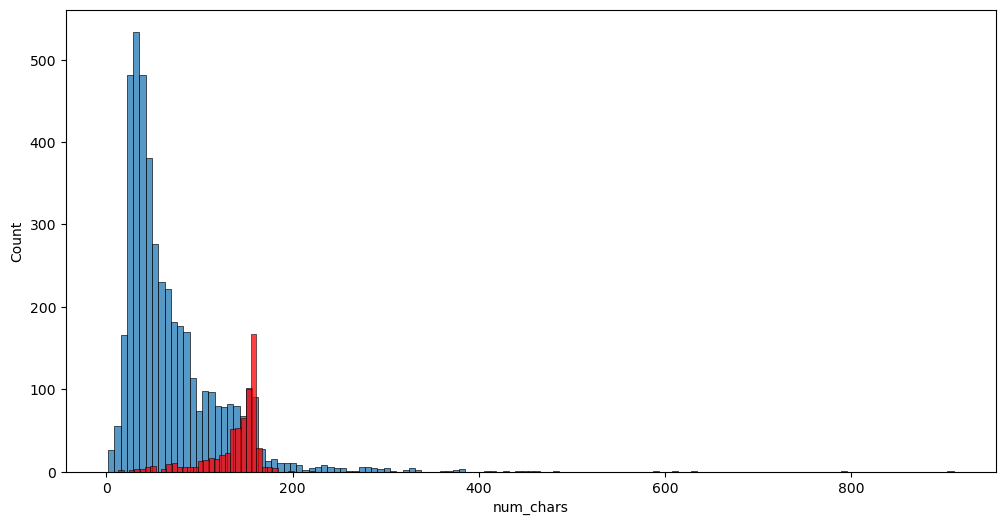

In [186]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'],color='red')
plt.show()

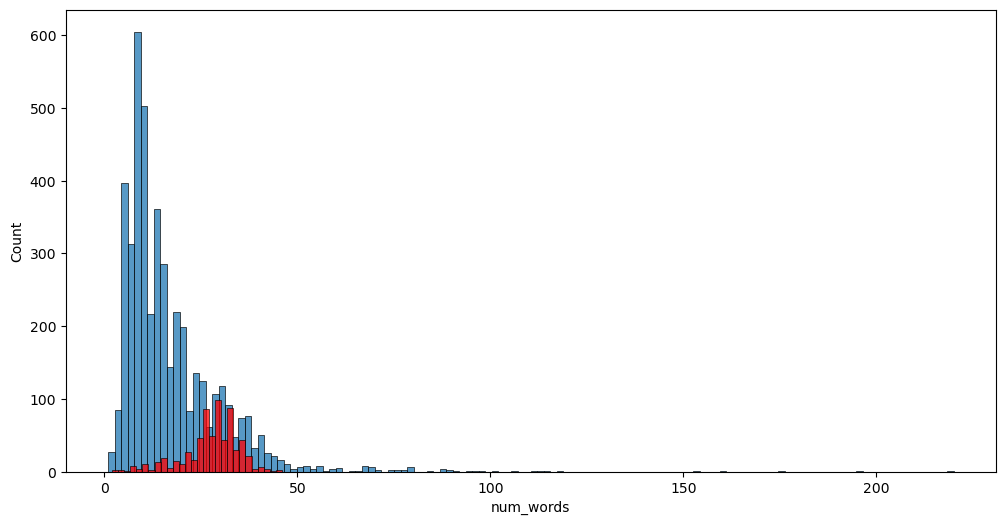

In [187]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

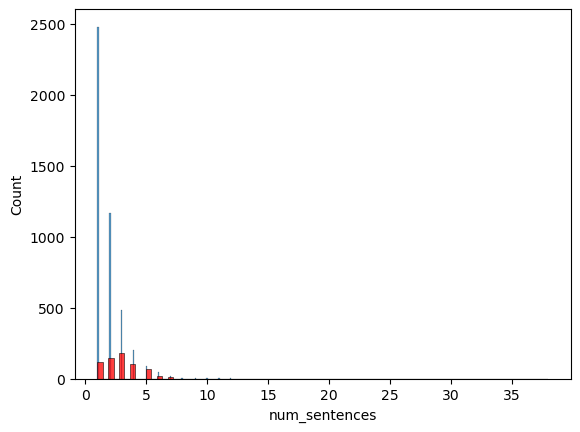

In [188]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.show()

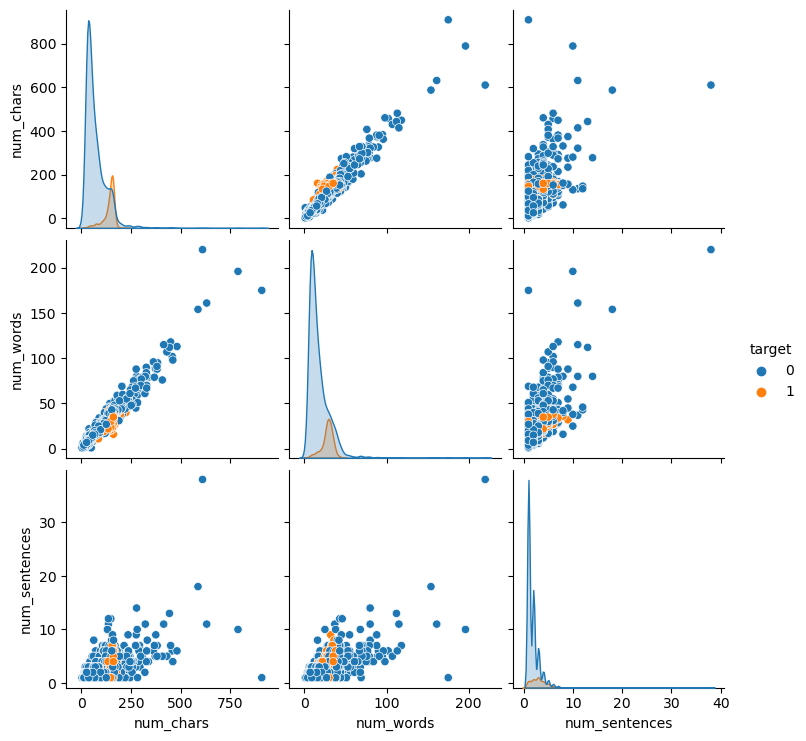

In [189]:
sns.pairplot(df,hue='target')

In [190]:
df.corr(numeric_only=True)

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

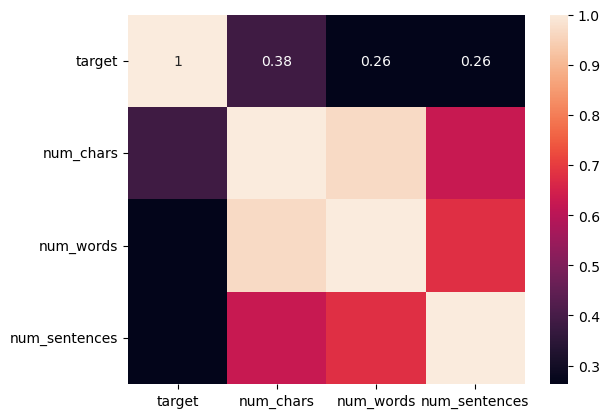

In [191]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing
- lower case
- tokenization
- remove special chars
- remove stop words
- stemming

In [193]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [194]:
ps = PorterStemmer()

In [195]:
def transform_text(text):
    text = text.lower()

    text = nltk.word_tokenize(text) # tokenizer will separate each words

    y = []
    for i in text: # removing special chars
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text: # removing stop words and punctuation marks
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [196]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [197]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [198]:
df['transformed_text'] = df['text'].apply(transform_text)

In [199]:
df

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [200]:
!pip install wordcloud

In [201]:
# word cloud of spam messages
from wordcloud import WordCloud

In [202]:
wc = WordCloud(height=500,width=500,background_color='white',min_font_size=10)

In [203]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

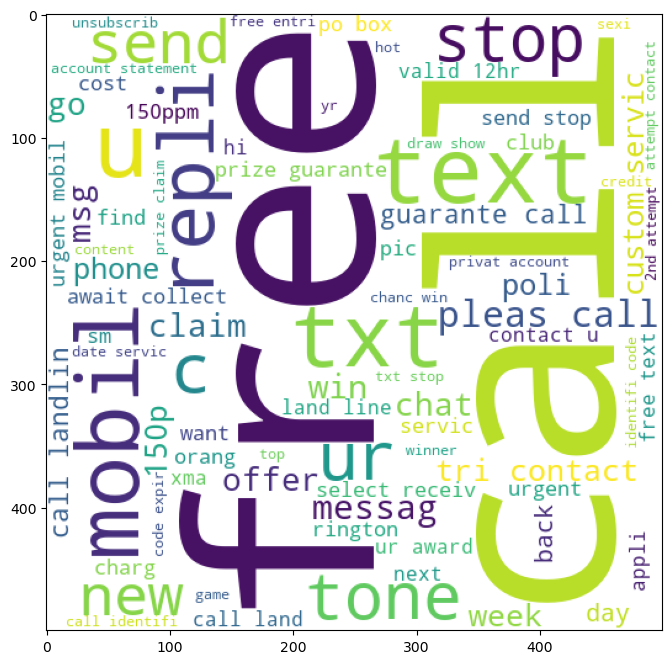

In [204]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [205]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

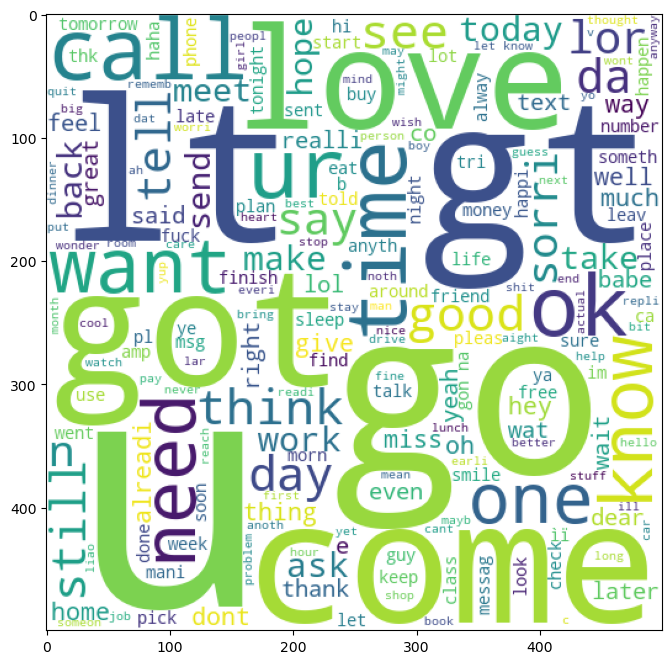

In [206]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

In [207]:
## finding top 30 words from spam msg
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [208]:
len(spam_corpus)

9939

In [209]:
from collections import Counter

In [210]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

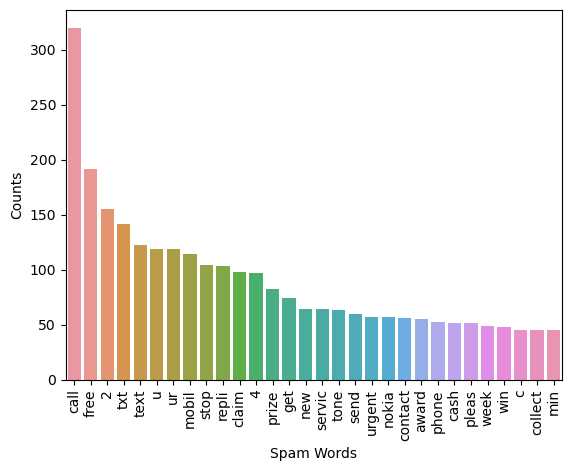

In [211]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Spam Words')
plt.ylabel('Counts')
plt.show()

In [212]:
## finding top 30 words from ham msg
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [213]:
len(ham_corpus)

35404

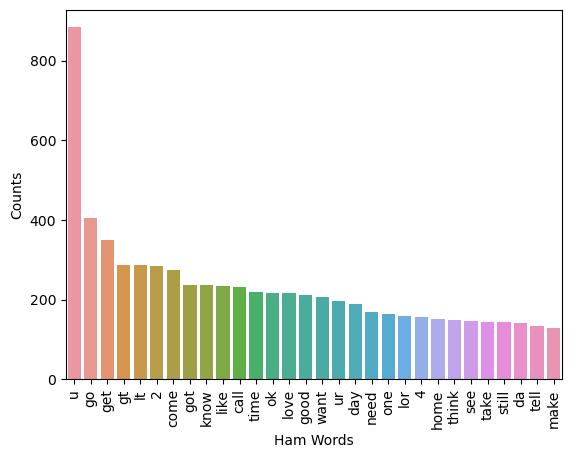

In [214]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Ham Words')
plt.ylabel('Counts')
plt.show()

# Model Building

In [216]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [217]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [218]:
X.shape

(5169, 3000)

In [219]:
 y = df['target'].values

In [220]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [221]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [222]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [223]:
gnb.fit(X_train,y_train)

GaussianNB()

In [224]:
y_pred1 = gnb.predict(X_test)

In [225]:
print('Gaussian',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

Gaussian 0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [226]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [227]:
y_pred2 = mnb.predict(X_test)

In [228]:
print('Multinomial',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

Multinomial 0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [229]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [230]:
y_pred3 = bnb.predict(X_test)

In [231]:
print('Bernaulli',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

Bernaulli 0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [232]:
## tfidf -- mnb

In [233]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [256]:
# C:\Users\Jay\AppData\Roaming\nltk_data